# Data Cleaning

In [497]:
import pandas as pd

weekly_sales_v2 = pd.read_csv("../data/processed/weekly_sales_v2.csv")

weekly_sales_v2.head(5)

,Date,Year,Month,Week_num,weekday,trend,Sales,baseline_sales,lift_pct,open_rate_store,...,Product_page_views,holiday_a,holiday_b,holiday_c,Digital_adstock,TV_adstock,OOH_adstock,Digital_sat,TV_sat,OOH_sat
0,2013-01-06,2013,1,1,6,1,26129335,3.584752e+07,-0.271098,0.572838,...,55075.497241,1,0,0,71476.013153,0.0,0.0,0.142295,0.0,0.0
1,2013-01-13,2013,1,2,6,2,49275222,3.585626e+07,0.374243,0.851890,...,73131.526628,0,0,0,113924.224582,0.0,0.0,0.296500,0.0,0.0
2,2013-01-20,2013,1,3,6,3,34377765,3.586500e+07,-0.041468,0.852530,...,42756.078058,0,0,0,138522.437796,0.0,0.0,0.383901,0.0,0.0
3,2013-01-27,2013,1,4,6,4,46040169,3.587375e+07,0.283395,0.853940,...,87081.888730,0,0,0,183862.288397,0.0,0.0,0.523305,0.0,0.0
4,2013-02-03,2013,2,5,6,5,38466029,3.590751e+07,0.071253,0.854196,...,60492.137175,0,0,0,162359.586298,0.0,0.0,0.461213,0.0,0.0


Drop baseline and lift pct columns.

These columns are derived from the target variable Sales

In [498]:
weekly_sales_v2 = weekly_sales_v2.drop(columns=["baseline_sales", "lift_pct"])
weekly_sales_v2.columns

Index(['Date', 'Year', 'Month', 'Week_num', 'weekday', 'trend', 'Sales',
       'open_rate_store', 'StateHoliday', 'SchoolHoliday', 'Promo',
       'promo_type', 'promo_type2', 'promo_intensity', 'promo_decay',
       'promo_adstock_norm', 'Digital_spend', 'TV_spend', 'OOH_spend', 'CPM',
       'Digital_impressions', 'CTR', 'Digital_clicks', 'LandingRate',
       'Product_page_views', 'holiday_a', 'holiday_b', 'holiday_c',
       'Digital_adstock', 'TV_adstock', 'OOH_adstock', 'Digital_sat', 'TV_sat',
       'OOH_sat'],
      dtype='object')

## should i delete open rate var?

Drop week num and year 



In [499]:
weekly_sales_v2 = weekly_sales_v2.drop(columns=["Week_num", "Year"])
weekly_sales_v2.columns


Index(['Date', 'Month', 'weekday', 'trend', 'Sales', 'open_rate_store',
       'StateHoliday', 'SchoolHoliday', 'Promo', 'promo_type', 'promo_type2',
       'promo_intensity', 'promo_decay', 'promo_adstock_norm', 'Digital_spend',
       'TV_spend', 'OOH_spend', 'CPM', 'Digital_impressions', 'CTR',
       'Digital_clicks', 'LandingRate', 'Product_page_views', 'holiday_a',
       'holiday_b', 'holiday_c', 'Digital_adstock', 'TV_adstock',
       'OOH_adstock', 'Digital_sat', 'TV_sat', 'OOH_sat'],
      dtype='object')

### holidays merge or drop?

## Nulls

In [500]:
weekly_sales_v2.isnull().sum()

Date                    0
Month                   0
weekday                 0
trend                   0
Sales                   0
open_rate_store         0
StateHoliday            0
SchoolHoliday           0
Promo                   0
promo_type             63
promo_type2            63
promo_intensity         0
promo_decay             0
promo_adstock_norm      0
Digital_spend           0
TV_spend                0
OOH_spend               0
CPM                     0
Digital_impressions     0
CTR                     0
Digital_clicks          0
LandingRate             0
Product_page_views      0
holiday_a               0
holiday_b               0
holiday_c               0
Digital_adstock         0
TV_adstock              0
OOH_adstock             0
Digital_sat             0
TV_sat                  0
OOH_sat                 0
dtype: int64

## Duplicates

In [501]:
weekly_sales_v2.duplicated().sum()

np.int64(0)

## Data gaps

In [502]:
weekly_sales_v2["Date"] = pd.to_datetime(weekly_sales_v2["Date"], errors="coerce")
weekly_sales_v2 = weekly_sales_v2.sort_values("Date").reset_index(drop=True)

weekly_sales_v2["date_diff"] = weekly_sales_v2["Date"].diff()
weekly_sales_v2["date_diff"] = weekly_sales_v2["date_diff"].dt.days
weekly_sales_v2[["Date","date_diff"]].head(5)


,Date,date_diff
0,2013-01-06,NaN
1,2013-01-13,7.0
2,2013-01-20,7.0
3,2013-01-27,7.0
4,2013-02-03,7.0


In [503]:
weekly_sales_v2["date_diff"].value_counts()

date_diff
7.0    134
Name: count, dtype: int64

In [504]:
weekly_sales_v2["StateHoliday"].nunique()

2

In [505]:
weekly_sales_v2["SchoolHoliday"].nunique()

92

In [506]:
weekly_sales_v2["SchoolHoliday"]

0      0.740103
1      0.083471
2      0.000000
3      0.000000
4      0.019199
         ...   
130    0.212798
131    0.212956
132    0.372838
133    0.521162
134    0.798922
Name: SchoolHoliday, Length: 135, dtype: float64

temporalmente dropear school holiday. solo se ocupa un holiday?

In [507]:
weekly_sales_v2 = weekly_sales_v2.drop(columns="SchoolHoliday")

In [508]:
with pd.option_context("display.max_columns", None):
    display(weekly_sales_v2.head())


,Date,Month,weekday,trend,Sales,open_rate_store,StateHoliday,Promo,promo_type,promo_type2,promo_intensity,promo_decay,promo_adstock_norm,Digital_spend,TV_spend,OOH_spend,CPM,Digital_impressions,CTR,Digital_clicks,LandingRate,Product_page_views,holiday_a,holiday_b,holiday_c,Digital_adstock,TV_adstock,OOH_adstock,Digital_sat,TV_sat,OOH_sat,date_diff
0,2013-01-06,1,6,1,26129335,0.572838,1,0.000000,NaN,NaN,-0.000000,-0.000000,0.000000,71476.013153,0.0,0.0,6.108456,1.170116e+07,0.009486,111002.906731,0.496163,55075.497241,1,0,0,71476.013153,0.0,0.0,0.142295,0.0,0.0,NaN
1,2013-01-13,1,6,2,49275222,0.851890,0,0.831102,caguamas,caguamas,0.311034,0.311034,0.585096,78186.218005,0.0,0.0,6.657182,1.174464e+07,0.012347,145011.371049,0.504316,73131.526628,0,0,0,113924.224582,0.0,0.0,0.296500,0.0,0.0,7.0
2,2013-01-20,1,6,3,34377765,0.852530,0,0.000000,NaN,NaN,-0.000000,0.155517,0.292548,81560.325505,0.0,0.0,5.848056,1.394657e+07,0.007442,103783.699864,0.411973,42756.078058,0,0,0,138522.437796,0.0,0.0,0.383901,0.0,0.0,7.0
3,2013-01-27,1,6,4,46040169,0.853940,0,0.830758,discount,caguamas,0.235432,0.313191,0.731127,114601.069498,0.0,0.0,5.604729,2.044721e+07,0.009471,193648.184854,0.449691,87081.888730,0,0,0,183862.288397,0.0,0.0,0.523305,0.0,0.0,7.0
4,2013-02-03,2,6,5,38466029,0.854196,0,0.000000,NaN,NaN,0.000000,0.156595,0.365564,70428.442099,0.0,0.0,5.811603,1.211859e+07,0.010723,129948.869713,0.465507,60492.137175,0,0,0,162359.586298,0.0,0.0,0.461213,0.0,0.0,7.0


PROMO ONE HOT ENCODING

In [509]:

weekly_sales_v2["promo_type"].value_counts()
weekly_sales_v2 = weekly_sales_v2.drop(columns= "promo_type")

In [510]:
weekly_sales_v2["promo_type2"].value_counts()


promo_type2
caguamas    72
Name: count, dtype: int64

In [511]:
weekly_sales_v2["promo"] = (weekly_sales_v2["promo_type2"] == "caguamas").astype(int)
weekly_sales_v2 = weekly_sales_v2.drop(columns=["promo_type2"])

In [512]:
with pd.option_context("display.max_columns", None):
    display(weekly_sales_v2.head())

,Date,Month,weekday,trend,Sales,open_rate_store,StateHoliday,Promo,promo_intensity,promo_decay,promo_adstock_norm,Digital_spend,TV_spend,OOH_spend,CPM,Digital_impressions,CTR,Digital_clicks,LandingRate,Product_page_views,holiday_a,holiday_b,holiday_c,Digital_adstock,TV_adstock,OOH_adstock,Digital_sat,TV_sat,OOH_sat,date_diff,promo
0,2013-01-06,1,6,1,26129335,0.572838,1,0.000000,-0.000000,-0.000000,0.000000,71476.013153,0.0,0.0,6.108456,1.170116e+07,0.009486,111002.906731,0.496163,55075.497241,1,0,0,71476.013153,0.0,0.0,0.142295,0.0,0.0,NaN,0
1,2013-01-13,1,6,2,49275222,0.851890,0,0.831102,0.311034,0.311034,0.585096,78186.218005,0.0,0.0,6.657182,1.174464e+07,0.012347,145011.371049,0.504316,73131.526628,0,0,0,113924.224582,0.0,0.0,0.296500,0.0,0.0,7.0,1
2,2013-01-20,1,6,3,34377765,0.852530,0,0.000000,-0.000000,0.155517,0.292548,81560.325505,0.0,0.0,5.848056,1.394657e+07,0.007442,103783.699864,0.411973,42756.078058,0,0,0,138522.437796,0.0,0.0,0.383901,0.0,0.0,7.0,0
3,2013-01-27,1,6,4,46040169,0.853940,0,0.830758,0.235432,0.313191,0.731127,114601.069498,0.0,0.0,5.604729,2.044721e+07,0.009471,193648.184854,0.449691,87081.888730,0,0,0,183862.288397,0.0,0.0,0.523305,0.0,0.0,7.0,1
4,2013-02-03,2,6,5,38466029,0.854196,0,0.000000,0.000000,0.156595,0.365564,70428.442099,0.0,0.0,5.811603,1.211859e+07,0.010723,129948.869713,0.465507,60492.137175,0,0,0,162359.586298,0.0,0.0,0.461213,0.0,0.0,7.0,0


# Saturation and adstock datasets

In [513]:
# Features for saturation model
features_sat = [
    #mkt saturation
    'Digital_sat', 'TV_sat', 'OOH_sat',

    #promo
    'promo', 

    #controls 
    'trend', 'Month',
    'holiday_a', 'holiday_b', 'holiday_c',

]

# Prepare dataset for saturation
X_sat = weekly_sales_v2[features_sat].copy()
y = weekly_sales_v2['Sales'].copy()


# Features for adstock model
features_adstock = [
    # Marketing (adstock only, linear response)
    'Digital_adstock', 'TV_adstock', 'OOH_adstock',

    # Promotions (same as Dataset A)
    'promo',

    # Controls (same as Dataset A)
    'trend', 'Month',
    'holiday_a', 'holiday_b', 'holiday_c'
]

# Prepare dataset for adstock model
X_adstock = weekly_sales_v2[features_adstock].copy()
# y is the same as Dataset A

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Check both datasets
vif_sat = calculate_vif(X_sat)
vif_adstock = calculate_vif(X_adstock)

print("VIF - Saturation Model:")
print(vif_sat)
print("\nVIF - Adstock Model:")
print(vif_adstock)

# Flag: VIF > 10 indicates problematic multicollinearity
# Target: All VIF < 5 is ideal

VIF - Saturation Model:
       Feature        VIF
0  Digital_sat  12.604464
5        Month   6.519999
4        trend   4.954835
3        promo   2.471377
2      OOH_sat   2.278203
1       TV_sat   1.893018
6    holiday_a   1.257205
8    holiday_c   1.159462
7    holiday_b   1.151690

VIF - Adstock Model:
           Feature        VIF
0  Digital_adstock  11.597389
5            Month   5.343291
4            trend   4.484731
3            promo   2.443460
1       TV_adstock   1.613819
2      OOH_adstock   1.441246
6        holiday_a   1.262099
7        holiday_b   1.142248
8        holiday_c   1.137243


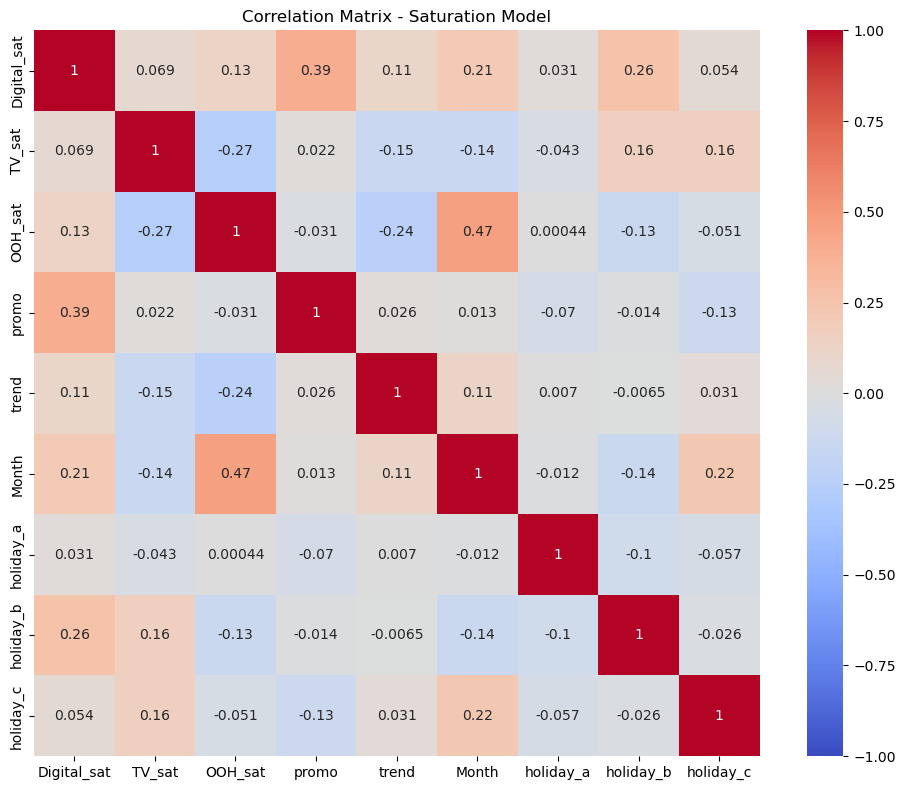

High correlations (>0.8): Series([], dtype: float64)


In [514]:
import seaborn as sns
import matplotlib.pyplot as plt

# Saturation model correlation
corr_sat = X_sat.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sat, annot=True, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix - Saturation Model')
plt.tight_layout()
plt.show()

# Check for high correlations (> 0.8)
high_corr_sat = corr_sat[(corr_sat > 0.8) & (corr_sat < 1.0)]
print("High correlations (>0.8):", high_corr_sat.stack())


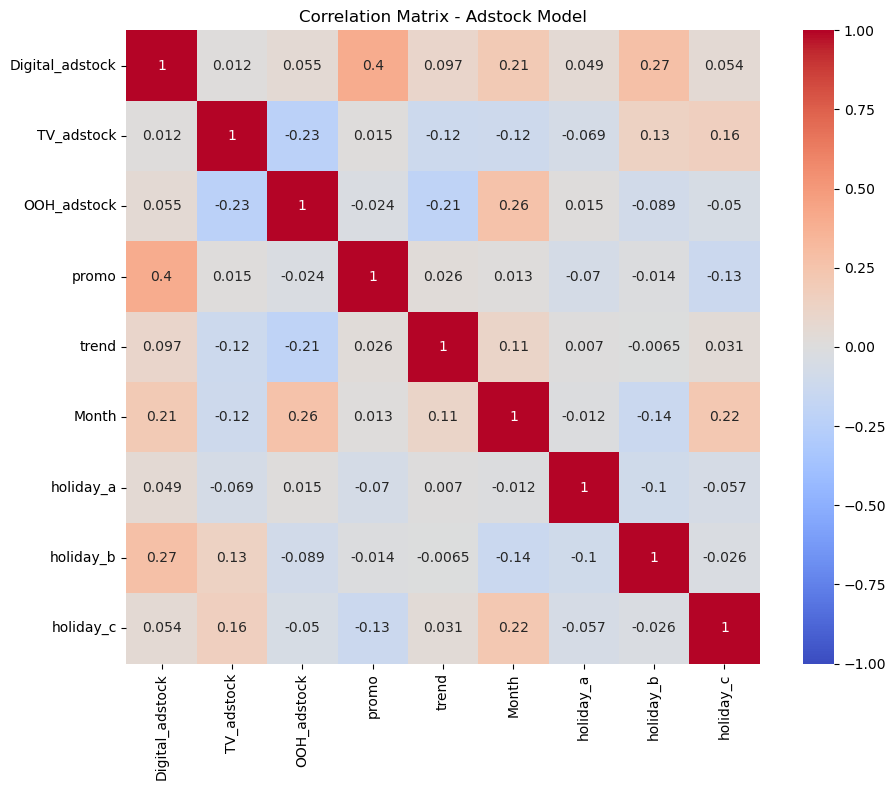

High correlations (>0.8): Series([], dtype: float64)


In [515]:
# Adstock model correlation
corr_adstock = X_adstock.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_adstock, annot=True, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, square=True)
plt.title('Correlation Matrix - Adstock Model')
plt.tight_layout()
plt.show()

# Check for high correlations (> 0.8)
high_corr_adstock = corr_adstock[(corr_adstock > 0.8) & (corr_adstock < 1.0)]
print("High correlations (>0.8):", high_corr_adstock.stack())


## export datasets

In [516]:
# Create final datasets with target variable
df_sat_final = X_sat.copy()
df_sat_final['Sales'] = y
df_sat_final['Date'] = weekly_sales_v2['Date']

df_adstock_final = X_adstock.copy()
df_adstock_final['Sales'] = y
df_adstock_final['Date'] = weekly_sales_v2['Date']

# Save to processed data folder
df_sat_final.to_csv('../data/processed/weekly_sales_saturation.csv', index=False)
df_adstock_final.to_csv('../data/processed/weekly_sales_adstock.csv', index=False)

print(f"✅ Saturation model dataset: {df_sat_final.shape}")
print(f"✅ Adstock model dataset: {df_adstock_final.shape}")


✅ Saturation model dataset: (135, 11)
✅ Adstock model dataset: (135, 11)
